# First example with parameter space (PS) concept simulation

<br>This example provides basic idea to simulate a random structure of size *```m```* within PSC.<br><br>

The module *````MCNDPS_EPA````* does the simulation and the settings can be controlled using the input arguments
*```dimension```*, *```noofRO```*, *````noofpair````*  *````iorg````*

> 1. *````iorg````*         - should either **amplitude** or ***intensity***. This represents the phase information from the experiment (<span style="color:red">**Default set to amplitude**</span>)
> 2. *```noofRO```*         - number of reflections to be assumed in the simulation (<span style="color:red">**Must be specified**</span>)
> 3. *````noofpair````*     - represents how many number random structure to be generated for the simulation (<span style="color:red">**Must be specified**</span>)
> 4. *```dimension```*      - represent the size of structure. This must be >=3. (<span style="color:red">**Must be specified**</span>)

With above settings, *````MCNDPS_EPA````* will generate *```noofpair```* number of random structures. If the structure is known, *````structure````* <br>
argument can be invoked, in this case variable *```noofpair```* will be discarded and *````structure````* will be assumed in the calculation. <br><br>


If a calculation is failed, it can be restarted from the previous level. To restart a calculation<br>
> 5. *````restart````*         - A boolean type variable to either switch on (True) or off (False) the restart option. (<span style="color:red">**Default set to False**</span>)   
> 6. *````restarth````*        - The last reflection where the previous simulation stopped (<span style="color:red">**Must be specified if *````restart = True````***</span>)   
> 7. *````restartpath````*    - path of folder where the results of previous simulation is stored (<span style="color:red">**Must be specified if *````restart = True````***</span>)     


The parameter *```dimension```* must be specified even in the restart calculation. The variable *````imax````* defines the range of PS axes. For centrosymmetric crystals it is *````0.5````*     

> 8.  [Importing modules](#import) - cell imports the required modules
> 9.  [Run MC simulation](#run)  - cell invokes *````MCNDPS_EPA````* module and solves random structure<br>
> 10. [Plot structure data](#plot) - cell plots structure data from [Run MC simulation](#run) cell
> 11. [Plot time information](#plottime)   -   cell plots time consumed in the MC simulation <br>

This example assumes *````iorg = amplitude````*

## <a id='import'></a><font color = 'green'> **Importing modules**

In [1]:
%matplotlib widget

import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np

from psc.tools.xplottime import plottotaltime
from psc.tools.plot3DMCresults import plot3dmcresults
from psc.lib.MCinNDPS_EPA import MCNDPS_EPA

## <a id='run'></a><font color = 'green'> **Run MC simulation in 3D PS**

In [5]:
# ---> call MCinND_EPA to solve a structure. 
# ---> Must be specified variables: dimension (must be >=3), number of structures you
#      want to test and number of reflection to be taken into account.

# ------------------> WARNUNG <--------------------------------------------------------
# dimension must be 3 or higher. for dimension=2 we have another routine to call

MCNDPS_EPA(dimension=3, noofpair=1, structure=[], noofRO=5, iorg='amplitude', restart=False, restarth=5, restartpath='./', imax=0.5)

---> I find noofpair variable to be true. I will create 1 pairs
---> Generated pairs are: 
 [[0.29305 0.06817 0.44237]]
===> Output files will be saved to  C:\Users\pearl\Desktop\pypscresults\MCresult-2024-09-18-150652  location


=====> for h =  2 ==============================

===> Pair- 1:  Current pair:  [0.29305 0.06817 0.44237] Solving for:  [0.43183 0.20695 0.05763]
start: 15:06:52 --> Polytope contains complete isosurface. Successful Linearization for RO = 1
--> Polytope contains complete isosurface. Successful Linearization for RO = 2
iso: 15:06:52 poly: 15:06:52 intersection: 15:06:52 sort sol: 15:06:52
contains_coordinates: [ True False]
In try- inx: [0] len(inx): 1 best_inx: 0
L(s):2 solution is at:0 wrt: 15:06:52  Total: 0:00:00.262881
---> predicted struc:[0.30436 0.06543 0.43824]. Given struc: [0.29305 0.06817 0.44237]

 intermediate total: 0:00:00.311056

=====> for h =  3 ==============================

===> Pair- 1:  Current pair:  [0.29305 0.06817 0.44237] Solving f

## <a id='plot'></a><font color = 'green'> **Plot MC simulation results**

To understand the meaning of the plot, see the manuscript.
THe following function can be useful only for three-dimensional PS calculations

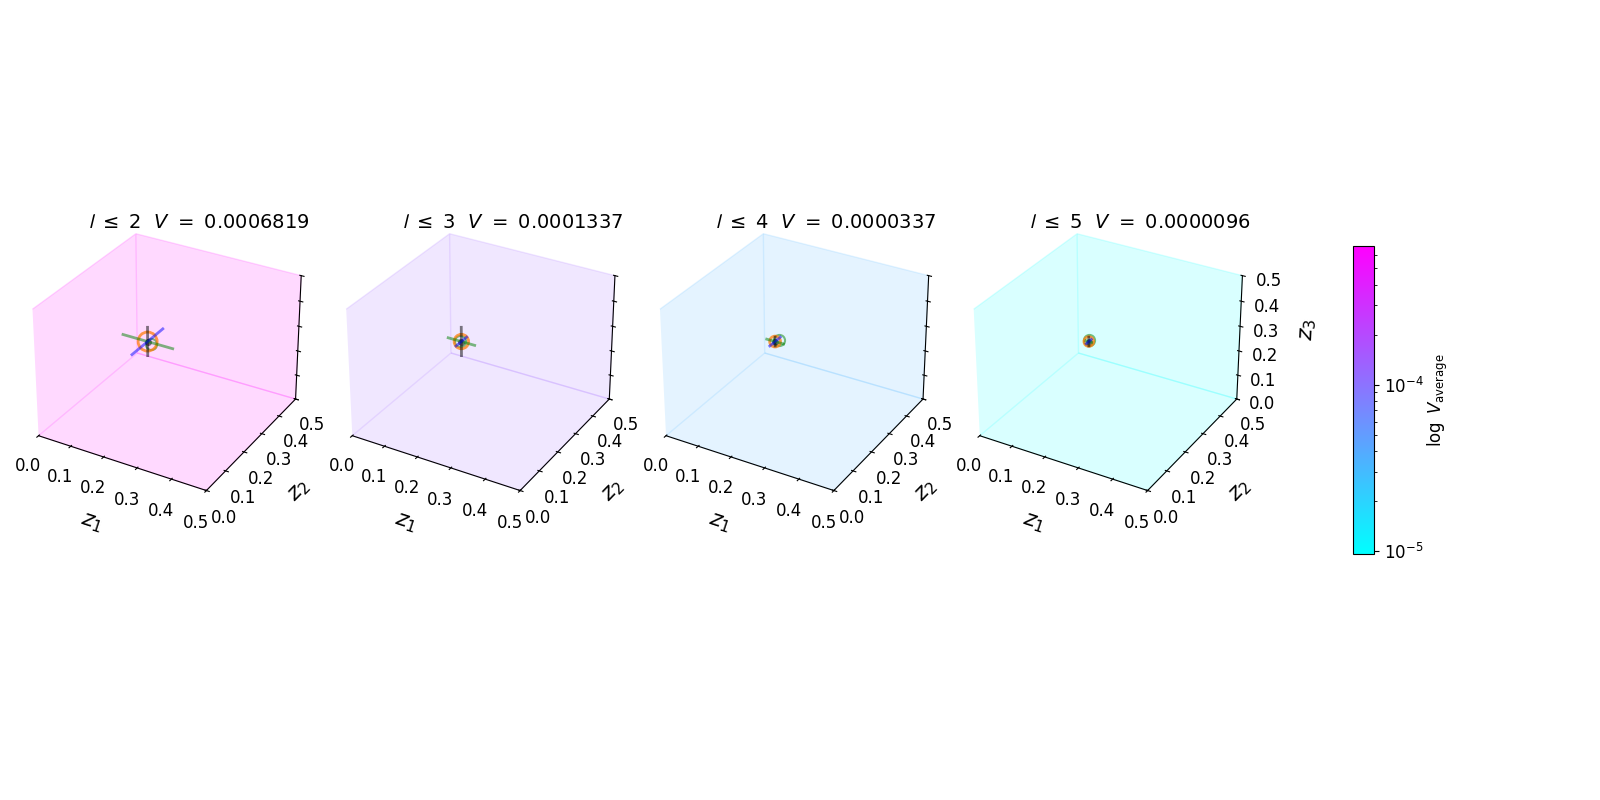

In [6]:

# ---> Routine starts to plot

h = 5

# ---> NOTE: change the folder name according to your calculation
folder='MCresult-2024-09-18-150652'
fpath  = os.path.join(os.path.expanduser("~"), 'Desktop', 'pypscresults', folder)

# ---> Routine starts to plot
plot3dmcresults(h, fpath)

## <a id='plottime'></a><font color = 'green'> **Plot MC simulation time consumption**
    1. To understand the meaning of the plot, see the manuscript
    2. Refer what is Box plot in python

---> I am reading files from the path :: C:\Users\pearl\Desktop\pypscresults\MCresult-2024-09-18-150652
---> fn : C:\Users\pearl\Desktop\pypscresults\MCresult-2024-09-18-150652\pnew_2.h5
---> fn : C:\Users\pearl\Desktop\pypscresults\MCresult-2024-09-18-150652\pnew_3.h5
---> fn : C:\Users\pearl\Desktop\pypscresults\MCresult-2024-09-18-150652\pnew_4.h5


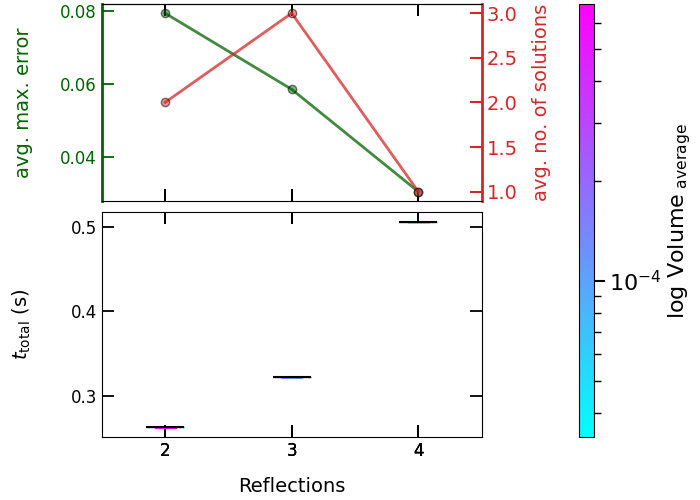

In [7]:

# ---> NOTE: change the reflection according to your calculation
h = 5; hl=np.arange(2, h)

# ---> NOTE: change the folder name according to your calculation
# ---> NOTE: change the folder name according to your calculation
folder='MCresult-2024-09-18-150652'
fpath  = os.path.join(os.path.expanduser("~"), 'Desktop', 'pypscresults', folder)

# ---> Routine starts to plot
plottotaltime(hl, fpath)